In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Setting the number of categories

In [3]:
NUM_CLASSES = 9

# Load learning data

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model Checkpoint Callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Early Abort Callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [11]:
# Update number of classes
NUM_CLASSES = 9  # Update to the correct number of classes

# Rebuild model with correct number of output classes
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
24/29 [=======================>......] - ETA: 0s - loss: 2.1505 - accuracy: 0.1647 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 1s 12ms/step - loss: 2.1257 - accuracy: 0.1807 - val_loss: 1.9124 - val_accuracy: 0.4119
Epoch 2/1000
23/29 [======================>.......] - ETA: 0s - loss: 1.8566 - accuracy: 0.3169
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 0s 5ms/step - loss: 1.8440 - accuracy: 0.3225 - val_loss: 1.6441 - val_accuracy: 0.4698
Epoch 3/1000
23/29 [======================>.......] - ETA: 0s - loss: 1.6431 - accuracy: 0.3916
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
29/29 [==============================] - 0s 5ms/step - loss: 1.6327 - accuracy: 0.3920 - val_loss: 1.4434 - val_accuracy: 0.4690
Epoch 4/1000
24/29 [=======================>......] - ETA: 0s - loss: 1.4860 - accuracy: 0.4

In [12]:
# model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9529


In [13]:
# Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 107ms/step
[2.4900842e-04 4.2025946e-02 9.5772237e-01 1.0020556e-06 3.5270318e-07
 5.8609356e-07 2.7354856e-09 5.9986587e-07 6.0385993e-08]
2


# Mixed rows

38/38 [==============================] - 0s 1ms/step


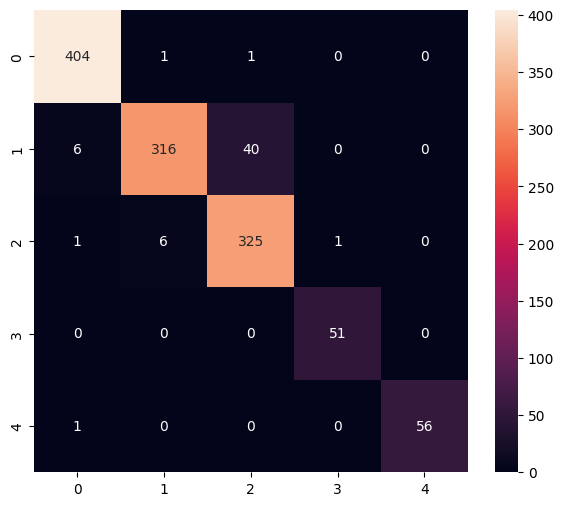

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       406
           1       0.98      0.87      0.92       362
           2       0.89      0.98      0.93       333
           3       0.98      1.00      0.99        51
           4       1.00      0.98      0.99        57

    accuracy                           0.95      1209
   macro avg       0.97      0.97      0.96      1209
weighted avg       0.96      0.95      0.95      1209



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite Convert to a model for

In [16]:
# Save as an inference-only model
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform the model (quantize it)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmp3mtnpa6k\assets


INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmp3mtnpa6k\assets


6792

# Reasoning test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get input/output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.99 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.4900862e-04 4.2025920e-02 9.5772237e-01 1.0020573e-06 3.5270386e-07
 5.8609356e-07 2.7354963e-09 5.9986706e-07 6.0386107e-08]
2
